# Markdown Cell Example 
markdown can be readibly interleaved and dispersed between code in notebooks 
## Explanation of code below
The histogram (x-axis) binned readability score, (y-axis) counts of papers that occupy that readability score. 

The histogram is initially populated exclusively by the ART corpus, but the idea was every time a new author got scraped from scholar, it would be added in, such that with each persons new search our big picture of science readability would be better informed.

So the histogram changes a little modestly perceptible amount with the author scrape, but three dots pertaining to the authors easiest read, hardest read, and mean read where added.

These used to be ```[mean-standard dev, mean, mean+standard dev]``` but there was a flaw implementing that. It could just be that the plot looked way too busy around the mean, and it was harder to look at.

There is an issue with getting the dots to appear in the centre of histogram bins. I was working under the assumption, that if I knew the ```[min,mean,max]```, readability scores for Rick Gerkin, I could add to them half the bin width, and dot's would be centred. That is almost correct. I forgot that these calculations are not performed on pre binned data, so the x-coordinates of ```[min,mean,max]``` need to be slightly shifted to the nearest histogram bin start first.

Think of it as a bit like snapping something to a grid in photoshop.

It should be easy to hack this code to run off a local machine, using sudo.
Set up the Environment. This is now done in requirements, and the postBuild script.
```python
!pip install matplotlib
!pip install pandas
!pip install seaborn

if os.path.exists('traingDats.p?dl=0'):
    pass

else:
    !wget https://www.dropbox.com/s/3h12l5y2pn49c80/traingDats.p?dl=0
    !wget https://www.dropbox.com/s/crarli3772rf3lj/more_authors_results.p?dl=0
    !wget https://www.dropbox.com/s/x66zf52himmp5ox/benchmarks.p?dl=0
```

In [25]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import copy
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import plotly as py

import glob
files = glob.glob("*.p")
discontents = pickle.load(open("_author_specificS S Phatak.p","rb"))
type(discontents[0])
df = discontents[0]
#print(type())


In [26]:
try:
    with open('scraped_new.p?dl=0','rb') as f:
        texts = pickle.load(f) 
except:
    !wget https://www.dropbox.com/s/1kc7alp79h701hx/scraped_new.p?dl=0
    with open('scraped_new.p?dl=0','rb') as f:
        texts = pickle.load(f) 

queries = set([t['query'] for t in texts ])
temp = [t for t in texts if 'standard' in t.keys() and 'wikipedia' in t['link']]
science = ['cancer','Vaccines','evolution','climate change','Transgenic','photosysnthesis','evolution','GMO']
res = [t['standard'] for t in temp if t['query'] in science]
#res = [t['standard'] for t in temp]# if t['query'] in science]

mwp = np.mean(res)  
abstract_wiki = {'standard':mwp}

In [27]:
#!pip install matplotlib
#!pip install pandas
#!pip install seaborn

if os.path.exists('traingDats.p?dl=0'):
    pass

else:
    !wget https://www.dropbox.com/s/3h12l5y2pn49c80/traingDats.p?dl=0
    !wget https://www.dropbox.com/s/crarli3772rf3lj/more_authors_results.p?dl=0
    !wget https://www.dropbox.com/s/x66zf52himmp5ox/benchmarks.p?dl=0
with open('traingDats.p?dl=0','rb') as f:
        trainingDats = pickle.load(f) 

bmark = pickle.load(open('benchmarks.p?dl=0','rb'))
#bmark.append(abstract_wiki)
#NAME,ar = pickle.load(open('more_authors_results.p?dl=0','rb'))
#NAME = NAME[0]
ar = discontents[2]
np.mean(df['standard'])
NAME = "Sayali S. Phatak"
trainingDats.extend(bmark)

In [28]:
print([b['standard'] for b in bmark])

[6.0, 8.0, 14.0, 16.0, 8.0, 16.0]


In [29]:

def get_heights(stats_items,histogram_content,x_sub_set):
    vertical_postions_indexs = []
    for i in stats_items:
        vertical_postions_indexs.append(find_nearest(histogram_content, i))
    bin_width_offset = (xys[1][0] - xys[0][0])/2.0
    x_sub_set = [ i+bin_width_offset for i in x_sub_set ]


    heights = []
    for i in vertical_postions_indexs:
        heights.append(xys[i][1])
    return heights, bin_width_offset


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def snap_to_grid(author_stats,bin_centers):
    author_stats_grid = []
    for as_ in author_stats:
        as_ = find_nearest(bin_centers,as_)
        author_stats_grid.append(bin_centers[as_])
    return author_stats_grid


In [30]:
max_ART = np.max([ t['standard'] for t in trainingDats ])
publication = [ t['publication'] for t in trainingDats if t['standard'] == max_ART ]
keys = [ t.keys() for t in trainingDats if t['standard'] == max_ART ]

fname = [ t['file_name'] for t in trainingDats if t['standard'] == max_ART ]
bmark_max_art = {'standard':max_ART}
#max_ART

In [31]:
%%capture
plt.ioff()

standard_sci = [ t['standard'] for t in trainingDats ]
ar = [ t for t in ar if type(t) is type({})]
ar = [ t for t in ar if 'standard' in t.keys()]
xys = [ (h.get_x(),h.get_height()) for h in sns.distplot(standard_sci).patches ]

x_grid = [ h.get_x() for h in sns.distplot(standard_sci).patches ]
offset = float((x_grid[1] - x_grid[0])/2.0)
bin_centers = [gr+offset for gr in x_grid]
# this plot not used yet.

fig = plt.figure(figsize=(10, 8), dpi=80)
ax1 = fig.add_subplot(111)#)
mean_ = np.mean([a['standard'] for a in ar])
min_ = np.min([a['standard'] for a in ar])
max_ = np.max([a['standard'] for a in ar])
std_ = np.std([a['standard'] for a in ar])
stats_items = [mean_,min_,max_]

g = sns.distplot(standard_sci, label="Readability Index")


histogram_content = [x[0] for x in xys]
height_content = np.array([x[1] for x in xys])

hc = np.array(histogram_content)

x_sub_set=histogram_content


other_name=str('Phytochromobilin C15-Z,syn - C15-E,anti isomerization: concerted or stepwise?')
worst_height,_ = get_heights([max_ART],hc,x_sub_set)
mwp_height,_ = get_heights([mwp],hc,x_sub_set)

#bmark_max_art
worst_height = worst_height[0]
#bmark_stats_items_grid = snap_to_grid(bmark_stats_items,bin_centers)

#worst_distamnce = snap_to_grid(max_ART,bin_centers)
worst_distance = snap_to_grid([max_ART],bin_centers)
mwp_distance = snap_to_grid([mwp],bin_centers)
x,y,z = (mwp_distance[0],mwp_height[0],str('mean wikipedia'))

#print(bmark)
bmark_stats_items = list(set([ b['standard'] for b in bmark ]))
bmark_stats_items.append(x)
#bmark_stats_items.append(max_ART)
bmark_heights, _ = get_heights(bmark_stats_items,histogram_content,x_sub_set)
heights, bwo = get_heights(stats_items,histogram_content,x_sub_set)
#bmark_heights.append(worst_height)
bmark_stats_items = [i+bwo for i in bmark_stats_items]
mean_a = mean_
min_a = min_ 
max_a = max_ 
xticks = list(range(0,45,5))

#print(xticks)
bmark_stats_items
box_content = [a['standard'] for a in ar]


In [32]:

bmark_stats_items_grid = snap_to_grid(bmark_stats_items,bin_centers)
author_stats =[i for i in [mean_,min_,max_]]
author_stats_grid = snap_to_grid(author_stats,bin_centers)
mean_a_grid = snap_to_grid([mean_a],bin_centers)
x_sub_set_grid = snap_to_grid(x_sub_set,bin_centers)

print(bmark_stats_items_grid)
#print(x)
#bmark_stats_items_grid.append(x)
#bmark_stats_items_grid
#bmark

[8.421875, 16.171875, 6.484375, 14.234375, 15.203125]


In [33]:
categories = [ "Readibility of Science Declining Over Time", "Post Modern Essay Generator","upgoer 5","Science of Writing","Mean Wikipedia"]#"Mean Wikipedia"]#,other_name]# "wikipedia science"]
bmark_stats_items_grid

[8.421875, 16.171875, 6.484375, 14.234375, 15.203125]

In [34]:
recalibrate_heights,b = get_heights(author_stats_grid,hc,x_sub_set)

heights[0] = np.max(recalibrate_heights)
heights[2] = recalibrate_heights[2]


In [35]:
np.max(height_content)
heights

[0.12512218963831867, 0.0044686496299399525, 0.008937299259879905]

In [36]:
bmark_heights
print(len(bmark_heights))
print(len(bin_centers))
print(len(bmark_stats_items))

5
64
5


In [37]:
print(len(bmark_stats_items_grid))

5


In [14]:
ar = np.array(ar)

In [17]:
from pylab import *


In [18]:
bmark_stats_items

[8.484375, 16.484375, 6.484375, 14.484375, 15.6875]

In [19]:
#categories
#categories.insert(3,'Mean Wikipedia Science')

In [20]:
#xinterval
x1,y1,z1 = (mwp_distance[0],mwp_height[0],str('mean wikipedia'))
x1
#bmark_heights[3]=y1

15.203125

In [21]:
set(bmark_stats_items_grid)
import copy
#del bmark_stats_items_grid[-2]
#del bmark_stats_items_grid[-1]
xinterval1 = copy.copy(bmark_stats_items_grid)
#xinterval1.insert(3,x1)
#xinterval1
#del bmark_heights[-1]
bmark_heights
print(len(bmark_heights))
print(len(bmark_stats_items_grid))

benchmarks = pd.DataFrame({
'benchmarks': bmark_stats_items_grid,
    'CDF': bmark_heights
    })

5
5


['Readibility of Science Declining Over Time', 'Post Modern Essay Generator', 'upgoer 5', 'Science of Writing', 'Mean Wikipedia']


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


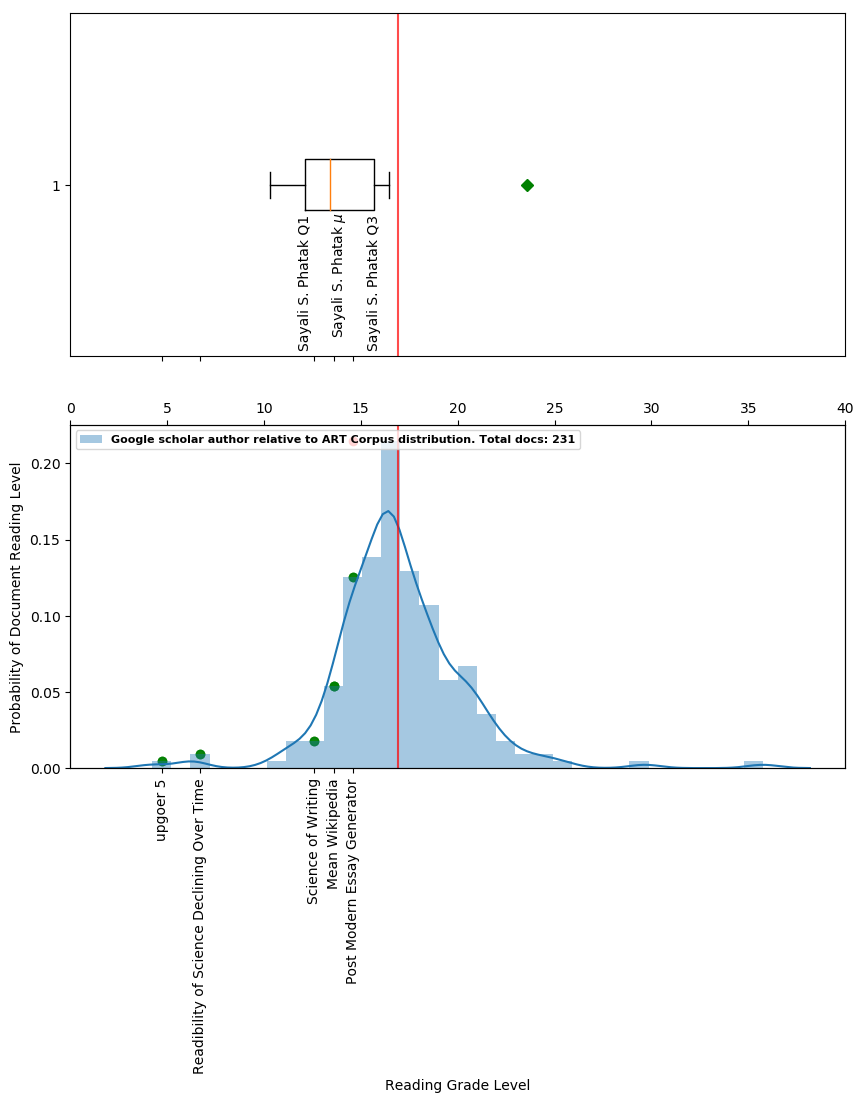

In [22]:
%matplotlib inline

import numpy as np
import scipy
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 10),nrows=2, ncols=1, sharex=True, dpi=100)


g = sns.distplot(standard_sci, label="Readability Index")


if str('data0') not in locals():
    data0 = pd.DataFrame({
    'mean, min, maximum': author_stats_grid,
        'CDF': heights
        })


    data2 = pd.DataFrame({
    'Standard Reading Level': mean_a_grid,
        'CDF': np.max(height_content)
        })




legend_properties = {'weight':'bold','size':8}
ax = sns.regplot(data=benchmarks, x="benchmarks", y="CDF", fit_reg=False, marker="o", color="green")
ax = sns.regplot(data=data2, x="Standard Reading Level", y="CDF", fit_reg=False, marker="o", color="red")
legendMain=ax.legend(labels=[str("std deviation")], prop=legend_properties,loc='upper right')
legendSide0=ax.legend(labels=[NAME],prop=legend_properties,loc='center right')
legendSide1=ax.legend(labels=[str('Number of Documents: '+str(len(ar)))],prop=legend_properties,loc='upper left')
legendMain=ax.legend(labels=[str("Google scholar author relative to ART Corpus distribution. Total docs: ")+str(len(trainingDats))], prop=legend_properties,loc='upper left')
#
print(categories)
x,y,z = (worst_distance[0],worst_height,other_name)
data3 = pd.DataFrame({
'Standard Reading Level': [x1],
    'CDF': [y1]
    })
ax = sns.regplot(data=data3, x='Standard Reading Level', y="CDF", fit_reg=False, marker="o", color="green")


axes[1] = ax = sns.regplot(data=benchmarks, x="benchmarks", y="CDF", fit_reg=False, marker="o", color="green")

ax2 = plt.twiny()
xticks = list(range(0,45,5))
ax2.set_xticks(xticks)

axes[1].set_xticks(xinterval1)
axes[1].set_xticklabels(categories, minor=False, rotation=90)

axes[1].axvline(np.mean(standard_sci), color='red', alpha=.7, linewidth=1.5)
axes[1].set_ylabel('Probability of Document Reading Level')
axes[1].set_xlabel('Reading Grade Level')
bp_dict = axes[0].boxplot(box_content, 0, 'gD', vert=False)


for line in bp_dict['medians']:
    x, y = line.get_xydata()[1] # top of median line

for line in bp_dict['boxes']:
    x0, y = line.get_xydata()[0] # bottom of left line
    axes[0].text(x0,y, str(NAME)+' Q1 ',horizontalalignment='center',verticalalignment='top',rotation=90)

    x1, y = line.get_xydata()[3] # bottom of right line
    axes[0]. text(x1,y, str(NAME)+' Q3 ',horizontalalignment='center',verticalalignment='top',rotation=90)

    axes[0]. text(np.abs(x1+x0)/2,y, str(NAME)+' $\mu$ ',horizontalalignment='center',verticalalignment='top',rotation=90)
    x2, y = line.get_xydata()[1] # bottom of right line
axes[0].axvline(np.mean(standard_sci), color='red', alpha=.7, linewidth=1.5)

    

In [23]:
categories

['Readibility of Science Declining Over Time',
 'Post Modern Essay Generator',
 'upgoer 5',
 'Science of Writing',
 'Mean Wikipedia']

In [24]:
bmark_stats_items_grid

[8.421875, 16.171875, 6.484375, 14.234375, 15.203125]